<a href="https://colab.research.google.com/github/ZenoZoldyck/Recurrent_Nets/blob/main/Apple_Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

tf.__version__

'2.5.0'

In [5]:
# load in the data

dataset = pd.read_csv("/content/AAPL_2006-01-01_to_2018-01-01.csv")
dataset[:10]

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
1,2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2,2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
3,2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
4,2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
5,2006-01-10,10.89,11.70,10.83,11.55,570088246,AAPL
6,2006-01-11,11.98,12.11,11.80,11.99,373548882,AAPL
7,2006-01-12,12.14,12.34,11.95,12.04,320201966,AAPL
8,2006-01-13,12.14,12.29,12.09,12.23,194153393,AAPL
9,2006-01-17,12.24,12.34,11.98,12.10,209215265,AAPL


In [6]:
training_set = dataset[:2771]["High"]
test_set = dataset[2771:]["High"]
training_set.head(), test_set.head()

(0    10.68
 1    10.85
 2    10.70
 3    10.96
 4    11.03
 Name: High, dtype: float64, 2771    118.16
 2772    119.43
 2773    119.38
 2774    119.93
 2775    119.30
 Name: High, dtype: float64)

In [52]:
# mean normalization done
training_set_norm = (training_set - dataset["High"].mean()) / dataset["High"].mean()
test_set_norm = (test_set - dataset["High"].mean()) / dataset["High"].mean()
test_set_norm = test_set_norm.reset_index(drop = True)
training_set_norm.head()

0   -0.836339
1   -0.833734
2   -0.836032
3   -0.832048
4   -0.830976
Name: High, dtype: float64

In [36]:
x_train = []
y_train = []
for i in range(60, 2770) :
  x_train.append(training_set_norm[i-60:i])
  y_train.append(training_set_norm[i])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train[0], y_train[0]

(array([-0.83633898, -0.83373389, -0.8360325 , -0.83204824, -0.83097556,
        -0.82070843, -0.81442556, -0.81090103, -0.81166723, -0.81090103,
        -0.81595797, -0.82116815, -0.82484593, -0.82576537, -0.82607185,
        -0.83036259, -0.83480657, -0.83894407, -0.83235472, -0.83281444,
        -0.8326612 , -0.83495981, -0.84062972, -0.84124268, -0.84783203,
        -0.84875147, -0.84844499, -0.85181629, -0.85380841, -0.85089684,
        -0.84752555, -0.84461397, -0.84476721, -0.8450737 , -0.84308157,
        -0.84017   , -0.84047648, -0.84216212, -0.84154916, -0.84783203,
        -0.84675934, -0.84691258, -0.85181629, -0.85350193, -0.85288897,
        -0.85442138, -0.85886536, -0.8548811 , -0.85258249, -0.85105008,
        -0.85350193, -0.85656675, -0.85671999, -0.85917184, -0.86147045,
        -0.86453526, -0.86652739, -0.86560794, -0.86836628, -0.86315609]),
 -0.861470446379526)

In [37]:
x_train.shape
x_train = tf.reshape(x_train, shape = (2710, 60, 1))
x_train[0].shape

TensorShape([60, 1])

In [38]:
y_train.shape

(2710,)

In [39]:
# time for model creation

model_1 = tf.keras.Sequential([
     tf.keras.layers.LSTM(50, return_sequences = True, input_shape = (60, 1)),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(50, return_sequences = True),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(50, return_sequences = True),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.LSTM(50),
     tf.keras.layers.Dropout(0.2),
     tf.keras.layers.Dense(1)
])
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 60, 50)            10400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 50)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)               

In [40]:
# time to compile
model_1.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.RMSprop(),
              metrics = ["mse"])
history = model_1.fit(x_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
85/85 [==============================] - 6s 15ms/step - loss: 0.0231 - mse: 0.0231
Epoch 2/100
85/85 [==============================] - 1s 14ms/step - loss: 0.0116 - mse: 0.0116
Epoch 3/100
85/85 [==============================] - 1s 14ms/step - loss: 0.0107 - mse: 0.0107
Epoch 4/100
85/85 [==============================] - 1s 13ms/step - loss: 0.0092 - mse: 0.0092
Epoch 5/100
85/85 [==============================] - 1s 13ms/step - loss: 0.0086 - mse: 0.0086
Epoch 6/100
85/85 [==============================] - 1s 14ms/step - loss: 0.0080 - mse: 0.0080
Epoch 7/100
85/85 [==============================] - 1s 13ms/step - loss: 0.0077 - mse: 0.0077
Epoch 8/100
85/85 [==============================] - 1s 13ms/step - loss: 0.0074 - mse: 0.0074
Epoch 9/100
85/85 [==============================] - 1s 13ms/step - loss: 0.0071 - mse: 0.0071
Epoch 10/100
85/85 [==============================] - 1s 13ms/step - loss: 0.0072 - mse: 0.0072
Epoch 11/100
85/85 [=============================

In [ ]:
# boom we are done !!!

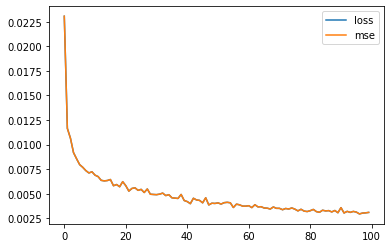

In [41]:
pd.DataFrame(history.history).plot()

In [77]:
test_set_norm = np.array(test_set_norm)
test_set_norm[0:5]

array([0.8106916 , 0.83015316, 0.82938696, 0.8378152 , 0.82816103])

In [89]:
# creation of test dataset...
x_test = []
for i in range(60, 249) :
  x_test.append(test_set_norm[i-60:i])

In [93]:
len(x_test)

189

In [96]:
# reshaping to feed into the model
x_test = tf.reshape(x_test, shape = (189, 60, 1))

In [123]:
y_preds = model_1.predict(x_train)

In [124]:
y_val = (y_preds * dataset["High"].mean()) + dataset["High"].mean()
y_val[0]

array([12.047104], dtype=float32)

In [114]:
test_set = test_set.reset_index(drop = True)

In [116]:
len(y_val)

189

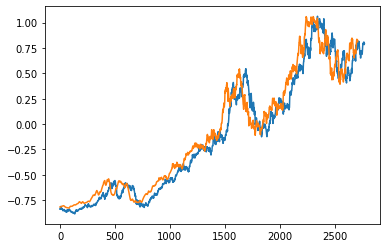

In [125]:
plt.plot(training_set_norm)
plt.plot(y_preds)